Problema de optimizacion y ajuste de curva de una contruccion de un edificio 


Objetivo general:

Encontrar la altura, superficie, numero de apartamentos y beneficio maxico de un edificio
   
Objetivo especifico:

-Aprender a obtener areas a base de funciones respecto a nuestra carrera
-Aplicar lo visto en clase a un problema enfocado en la ingenieria civil


Un promotor inmobiliario desea construir un edificio de apartamentos en una parcela de terreno rectangular. El edificio tendrá una altura máxima de 100 metros y una superficie máxima de 1000 metros cuadrados. El promotor desea obtener el máximo beneficio posible de la venta de los apartamentos, pero también quiere minimizar el coste de la construcción.
El coste de la construcción se puede estimar en función de la altura y la superficie del edificio. El coste por metro cuadrado de construcción es de 1000 euros, y el coste por metro de altura es de 500 euros.
El beneficio que obtendrá el promotor se puede estimar en función del número de apartamentos que pueda vender. El precio de venta de cada apartamento es de 200.000 euros.
El problema de optimización consiste en encontrar la altura y la superficie del edificio que maximicen el beneficio del promotor, teniendo en cuenta las restricciones de altura y superficie máximas.



Altura óptima: 50.0 metros
Superficie óptima: 500.0 metros cuadrados
Beneficio máximo: 4975000000.0 euros


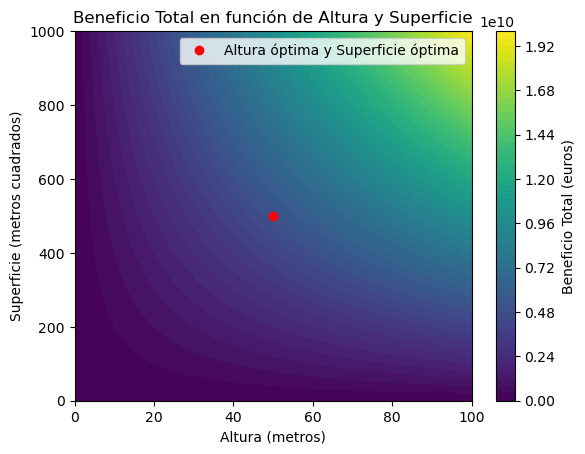

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Función objetivo a maximizar (beneficio total)
def objetivo(x):
    altura, superficie = x
    beneficio = -altura * superficie * 1000 + (200000 * altura * superficie)
    return -beneficio  # Negamos el beneficio para convertirlo en un problema de maximización

# Restricciones
restricciones = (
    {'type': 'ineq', 'fun': lambda x: 100 - x[0]},  # Altura máxima
    {'type': 'ineq', 'fun': lambda x: 1000 - x[1]}  # Superficie máxima
)

# Valores iniciales
x0 = [50, 500]  # Valores iniciales para altura y superficie

# Rango de valores para altura y superficie
altura_range = np.linspace(0, 100, 100)
superficie_range = np.linspace(0, 1000, 100)
X, Y = np.meshgrid(altura_range, superficie_range)
Z = np.zeros_like(X)

# Calcular el beneficio para cada combinación de altura y superficie
for i in range(len(altura_range)):
    for j in range(len(superficie_range)):
        x = [altura_range[i], superficie_range[j]]
        Z[i, j] = -objetivo(x)

# Resolución del problema de optimización
resultado = minimize(objetivo, x0, constraints=restricciones, method='SLSQP')

# Mostrar resultados
altura_optima, superficie_optima = resultado.x
beneficio_maximo = -resultado.fun  # Convertir nuevamente en positivo

print("Altura óptima:", altura_optima, "metros")
print("Superficie óptima:", superficie_optima, "metros cuadrados")
print("Beneficio máximo:", beneficio_maximo, "euros")

# Graficar el beneficio total en función de la altura y la superficie
plt.figure()
plt.contourf(X, Y, Z, levels=50, cmap='viridis')
plt.colorbar(label='Beneficio Total (euros)')
plt.xlabel('Altura (metros)')
plt.ylabel('Superficie (metros cuadrados)')
plt.title('Beneficio Total en función de Altura y Superficie')
plt.plot(altura_optima, superficie_optima, 'ro', label='Altura óptima y Superficie óptima')
plt.legend()
plt.show()